In [2]:
import numpy as np
import numpy.linalg as nlg
import scipy as sc
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [4]:
##############Complex spacing ratios of Ginibre matrices###################

start = timer()
def complex_spacing_ratios(n,ens):
    evt = []
    grdt = []
    for i in tqdm(range(ens)):
        H0 = np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real random gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        #H1 = np.random.normal(0, 1/np.sqrt(2), (n,n)) + 1j * np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real complex gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        eigv = nlg.eigvals(H0)
        evt.extend(eigv)
        grd = []
        kdt_eigv = np.stack([np.real(eigv), np.imag(eigv)], axis=-1)
        kdt = cKDTree(kdt_eigv)
        for j in range(n):
            dists, indices = kdt.query(kdt_eigv[j], 3)
            nns = eigv[indices]
            grd.append((nns[1] - eigv[j]) / (nns[2] - eigv[j]))
        grdt.append(grd)
    return evt,grdt

n = 200
ens = 1000

eigv,CSR = complex_spacing_ratios(n,ens)


end = timer()
print(end - start)

  0%|          | 0/1000 [00:00<?, ?it/s]

70.8738953


In [5]:
e1 = np.array(eigv).flatten()
e2 = np.array(CSR).flatten()
###There maybe more straight forward ways to flatten the list and plot

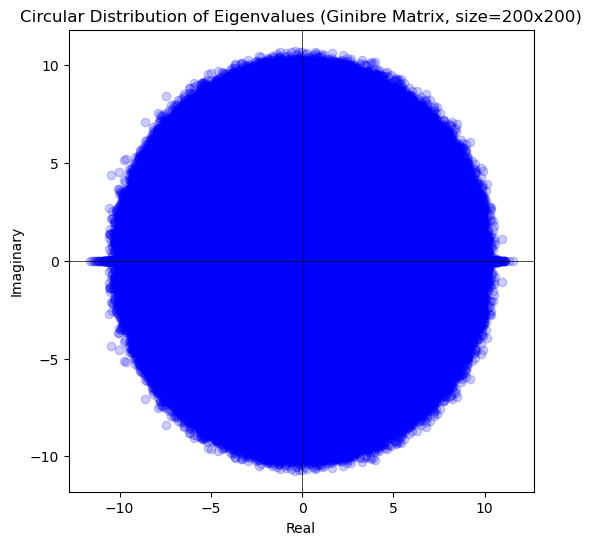

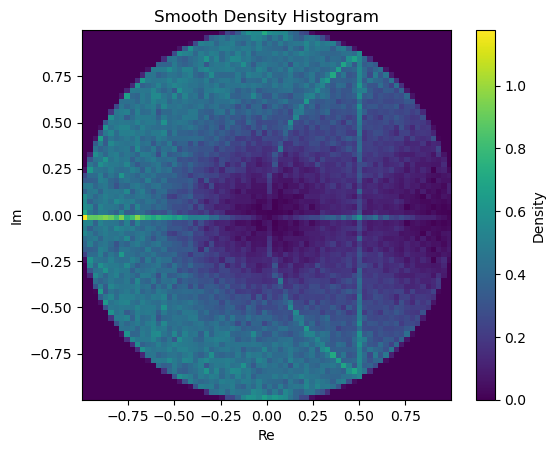

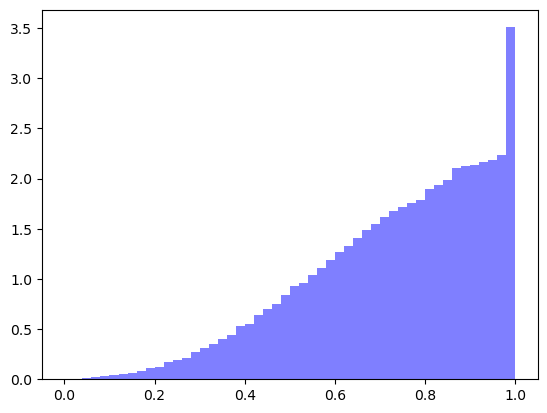

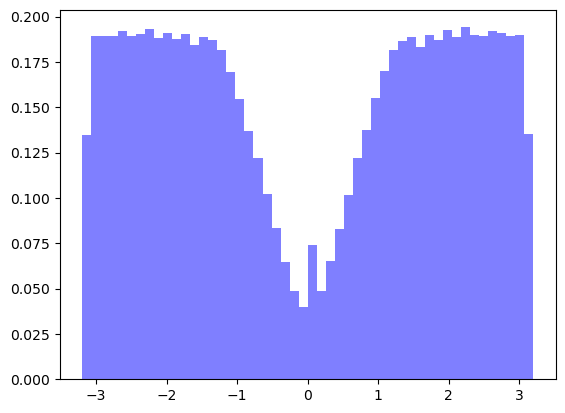

In [7]:
##########################The eigenvalue distribution##########################################
plt.figure(figsize=(6, 6))
plt.scatter(np.real(e1), np.imag(e1), color='blue', alpha=0.2)
plt.title(f"Circular Distribution of Eigenvalues (Ginibre Matrix, size={n}x{n})")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()
########### the heat map complex list plot for the complex spacing ratios######################
# Example data, replace this with your data
x = np.real(e2)
y = np.imag(e2)
# Calculate 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=70, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plot smooth density histogram
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Smooth Density Histogram')
plt.show()
#############The radial marginal distribution for the CSR (p(r) vs r)########################
plt.hist(np.abs(e2),range = [0,1],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()
##############The angular marginal distribution for the CSR (p(theta) vs theta)#####################
plt.hist(np.angle(e2),range = [-3.2,3.2],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()